<a href="https://colab.research.google.com/github/umeshrawat/AI_Math_Vedas/blob/master/CV_1_Fundamentals_Of_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital Image Fundamentals

In [ ]:
import os

local_assets_b = False

if local_assets_b:
  assets_dir = "/content/drive/MyDrive/IK/CV1/assets/P1/"

  if not os.path.isdir(assets_dir):
    assert os.path.isfile("assets.zip")
    os.system("unzip assets.zip")
else:
  from google.colab import drive
  drive.mount('/content/drive')
  assets_dir = '/content/drive/MyDrive/IK/CV1/assets'

Mounted at /content/drive


The below code shows how we can use Python to display an Image.

In [ ]:
!ls

drive  sample_data


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = assets_dir + "/P1/car-stock.jpeg"
image_pil = Image.open(image_path)


# Display the image
plt.imshow(image_pil)  # Permute dimensions to (H, W, C)
plt.axis('on')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/IK/CV1/assets/P1/car-stock.jpeg'

In [ ]:
image_pil.size

(612, 358)

In [ ]:
# Get the pixel value at location
pixel_value = image_pil.getpixel((10, 10))
# Print the pixel value
print(f"Pixel value at (10, 10): {pixel_value}")


# Get the pixel value at location
pixel_value = image_pil.getpixel((150, 200))
# Print the pixel value
print(f"Pixel value at (90, 200): {pixel_value}")

Pixel value at (10, 10): (255, 255, 255)
Pixel value at (90, 200): (91, 91, 91)


In [ ]:
image_pil.getpixel((510, 23))

(255, 255, 255)

Can you find the pixel value at (17,23)?

### Image Resolution & Pixel Density
We can find the Image Resolution and the Pixel Density using the below code.

In [ ]:
# Get image resolution (dots per inch)
dpi = image_pil.info['dpi']
print(f'Image Resolution: {dpi} DPI.')

# Get image size
width, height = image_pil.size
print(f'Image size: {width} x {height}')

# Calculate pixel density (assuming area=1)
pixels = width * height
density = pixels / (1024*1024) # each megapixel is 1024 * 1024
print(f'Pixel Density: {density:.2f} megapixels')

# Calculate aspect ratio
aspect_ratio = width / height
print(f'Aspect Ratio: {aspect_ratio:.2f}')

Image Resolution: (300, 300) DPI.
Image size: 612 x 358
Pixel Density: 0.21 megapixels
Aspect Ratio: 1.71


### Scaling an Image
The below code shows how we can scale an image.

In [ ]:
# from types import new_class
import torch
import torchvision.transforms as transforms

# Define the desired size
desired_size = (100, 200)  # New size (width, height)

# Resize the image
transform = transforms.Resize(desired_size)
resized_image = transform(image_pil)

print(f"Image size before scaling: {image_pil.size}")
print(f"Image size after scaling: {resized_image.size}")


# Calculate aspect ratio
new_width, new_height = resized_image.size
new_aspect_ratio = new_width / new_height
print(f'New Aspect Ratio: {new_aspect_ratio:.2f}')

Image size before scaling: (612, 358)
Image size after scaling: (200, 100)
New Aspect Ratio: 2.00


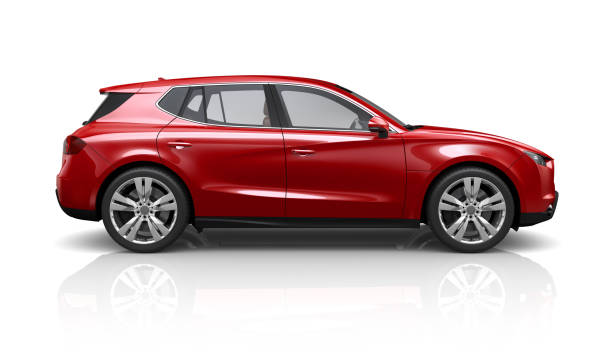

In [ ]:
image_pil

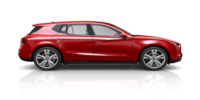

In [ ]:
resized_image

#### Question: See how the pixels are rearranged when the image is scaled. Calculate the DPI before and after the scaling i.e. the size, resolution, DPI etc

### Cropping
The below code shows how images can be cropped!

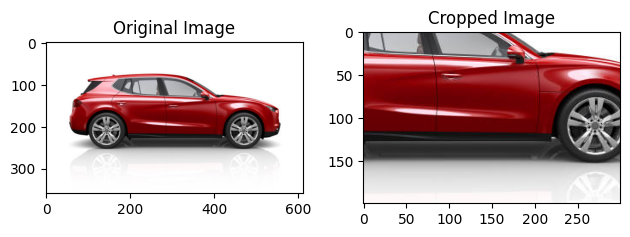

In [ ]:
from torchvision.transforms import functional as F

# Define the crop parameters
left = 200   # Leftmost pixel coordinate
top = 100    # Topmost pixel coordinate
width = 300  # Width of the cropped region
height = 200 # Height of the cropped region


cropped_image = F.crop(image_pil, top, left, height, width)

# Display the original and cropped images
fig, axes = plt.subplots(1, 2)

# Original image
axes[0].imshow(image_pil)
axes[0].set_title("Original Image")
axes[0].axis('on')

# Cropped image
axes[1].imshow(cropped_image)
axes[1].set_title("Cropped Image")
axes[1].axis('on')

plt.tight_layout()
plt.show()

### Rotating an Image
Here's how we can rotate an image!

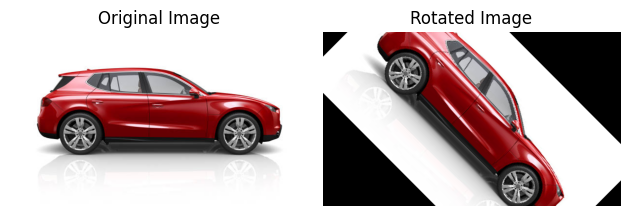

In [ ]:
# Define the rotation angle in degrees
angle = -45

rotated_image = F.rotate(image_pil, angle)

#augmentations


# Display the original and rotated images
fig, axes = plt.subplots(1, 2)

# Original image
axes[0].imshow(image_pil)
axes[0].set_title("Original Image")
axes[0].axis('off')

# Rotated image
axes[1].imshow(rotated_image)
axes[1].set_title("Rotated Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()


### Image Translation
This is not like language translation, this is what image translation does!!

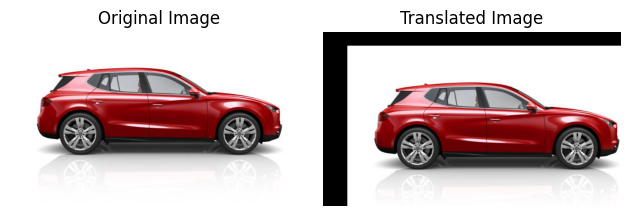

In [ ]:
# Define the translation parameters
translate_x = 50   # Translate along the x-axis
translate_y = 30  # Translate along the y-axis


translated_image = F.affine(
        image_pil,
        angle=0,
        translate=(translate_x, translate_y),
        scale=1,
        shear=0
    )


# Display the original and translated images
fig, axes = plt.subplots(1, 2)

# Original image
axes[0].imshow(image_pil)
axes[0].set_title("Original Image")
axes[0].axis('off')

# Translated image
axes[1].imshow(translated_image)
axes[1].set_title("Translated Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()


### Grayscale and Binary Images
Have you wondered how do Grayscale and Binary Images look like? Well here is the code for that!

RGB Image: An RGB (Red, Green, Blue) image is a type of digital image that represents colors by combining three color channels, each corresponding to one of the primary colors. This color model allows for a wide range of colors and is commonly used in digital photography and computer graphics.

Grayscale Image: A grayscale image is a single-channel image that represents variations in intensity using shades of gray. Unlike RGB images, grayscale images do not capture color information but focus solely on the brightness levels of each pixel. Grayscale images are often used in image processing tasks where color information is not essential, such as edge detection or image enhancement.

Binary Image: A binary image is a type of digital image that contains only two pixel values, typically representing objects as black and the background as white (or vice versa). It is commonly used in computer vision tasks like image segmentation and object detection, where the presence or absence of objects is the primary concern.

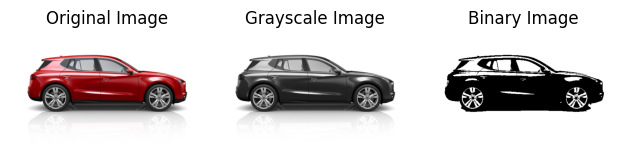

In [ ]:
import numpy as np

# Convert to grayscale
gray_transform = transforms.Grayscale()
# gray_transform input and output are PIL images
grayscale_image = gray_transform(image_pil)

# Convert to binary
binary_transform = transforms.Compose([
    transforms.ToTensor(),
    # transform.Lambda expects and outputs transforms
    transforms.Lambda(lambda x: x > 0.5),  # Thresholding to convert to binary
])
# 0.6 -> True: 1 255
# 0.4 -> False: 0 0
binary_image_tensor = binary_transform(grayscale_image)

# Convert binary image tensor to PIL image
binary_image_np = binary_image_tensor.squeeze().numpy()
binary_image = Image.fromarray(binary_image_np)

# Display the original, grayscale, and binary images
fig, axes = plt.subplots(1, 3)

# Original image
axes[0].imshow(image_pil)
axes[0].set_title("Original Image")
axes[0].axis('off')

# Grayscale image
axes[1].imshow(grayscale_image, cmap='gray')
axes[1].set_title("Grayscale Image")
axes[1].axis('off')

# Binary image
axes[2].imshow(binary_image, cmap='gray')
axes[2].set_title("Binary Image")
axes[2].axis('off')

plt.tight_layout()
plt.show()


### RGB vs HSV

#### Visit the website: https://math.hws.edu/graphicsbook/demos/c2/rgb-hsv.html

To use the RGB/HSV Color Demo website, follow these steps:
1. On the left side of the screen, you will see a large patch of color.
2. On the right side, there are six sliders.
3. The top three sliders represent the RGB color values for the color patch, while the bottom three sliders represent the HSV color values.
4. You can adjust the color by moving the sliders.
5. Note that the sliders are not independent. Changing an RGB slider can affect the HSV sliders, and changing an HSV slider can affect the RGB sliders.
6. You can try different settings and combinations to see how the color changes.
7. Some suggestions to try:
 - Check the eight colors that you can get by setting Red, Green, and Blue equal to 0 or 1.
 - Experiment with different settings on the RGB sliders.
 - Set Saturation and Value to 1 and slowly drag the Hue slider to observe how the RGB sliders change.
 - Try dragging the Hue slider with Saturation and Value set to values other than 1.
 - Set Saturation to 0 and drag the Value slider to see shades of gray. In this case, the Hue slider is irrelevant.

By using the sliders, you can interactively explore and visualize the difference between the RGB and HSV color models.


### Applying Filters on an Image

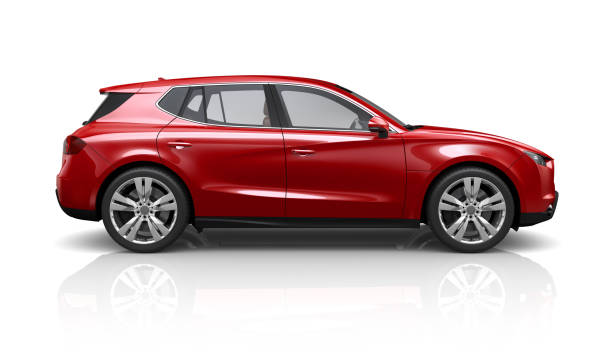

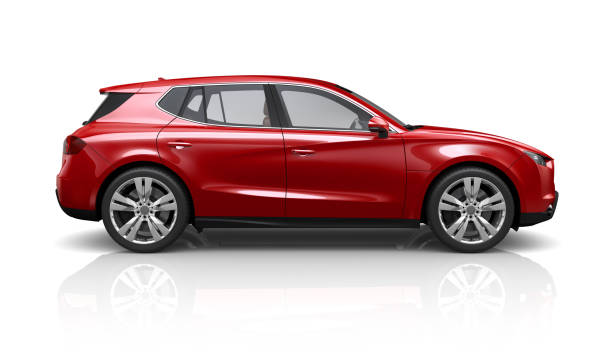

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread(image_path)

# Define a identity kernel
identity_kernel = np.array([[0,0,0],
                            [0,1,0],
                            [0,0,0]])

# identity_kernel = np.array([[0.11,0.11,0.11],
#                             [0.11,0.11,0.11],
#                             [0.11,0.11,0.11]])

# identity_kernel = np.array([[1, 0, -1],
#                               [1, 0, -1],
#                               [1, 0, -1]])

# Apply the identity kernel using convolution
identity_image = cv2.filter2D(image, -1, identity_kernel)

# Display the original and sharpened images
cv2_imshow(image)
cv2_imshow(identity_image)

### Sharpen an Image

Imagine you have a coloring book with a picture you've colored using crayons. Sharpening the image is like tracing over the edges of the picture with a dark pen or marker. It makes the lines of the picture bolder and clearer, so the colors look more defined and pop out. It's like giving your drawing a little makeover to make it stand out and look even more beautiful!

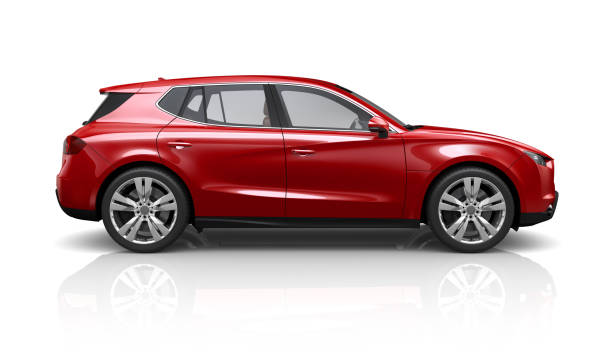

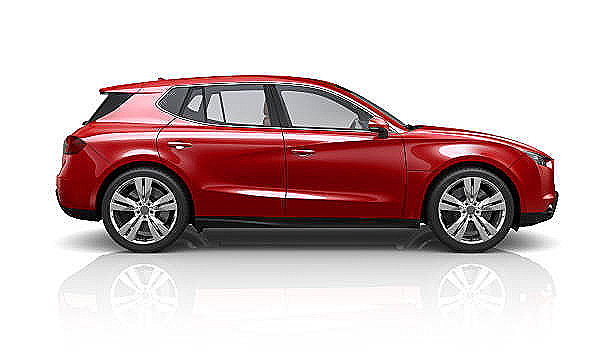

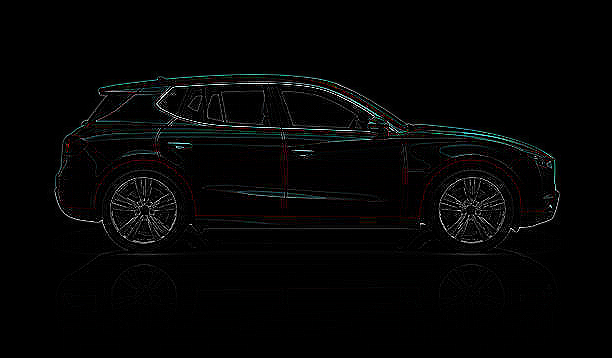

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread(image_path)

# Define a sharpening kernel
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])

# Apply the sharpening kernel using convolution
sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)


sharpening_kernel2 = np.array([[0, -1, 0],
                              [-1, 4, -1],
                              [0, -1, 0]])

# Apply the sharpening kernel using convolution
sharpened_image2 = cv2.filter2D(image, -1, sharpening_kernel2)


# Display the original and sharpened images
cv2_imshow(image)
cv2_imshow(sharpened_image)
cv2_imshow(sharpened_image2)





### Gaussian Blur

Imagine you have a drawing with lots of tiny dots. Gaussian Blur is like gently rubbing your drawing with a soft eraser. It makes the dots less sharp and smooths out the picture, so it looks a little fuzzy. This can be helpful to hide small mistakes or make the picture look softer and nicer to our eyes.

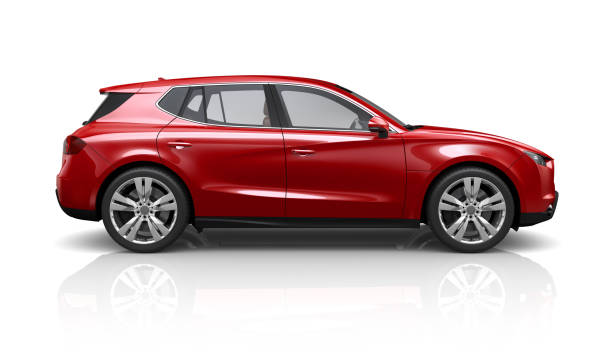

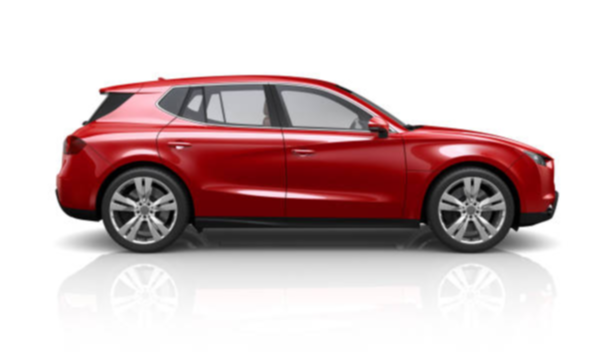

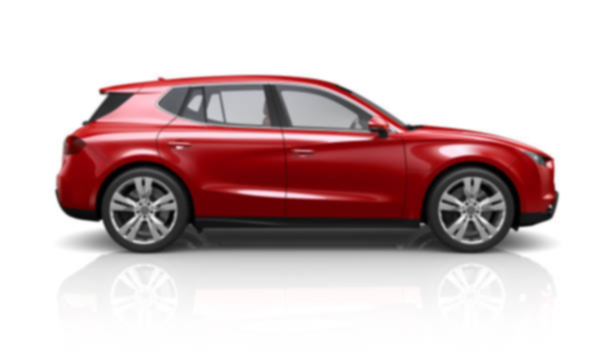

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread(image_path)

# Define a sharpening kernel
gaussian_blur_kernel = np.array([[1.0/16, 2.0/16, 1.0/16],
                              [2.0/16, 4.0/16, 2.0/16],
                              [1.0/16, 2.0/16, 1.0/16]])

# Apply the sharpening kernel using convolution
gaussian_blurred_image = cv2.filter2D(image, -1, gaussian_blur_kernel)
gaussian_blurred_image2 = cv2.filter2D(gaussian_blurred_image, -1, gaussian_blur_kernel)

# Display the original and sharpened images
cv2_imshow(image)
cv2_imshow(gaussian_blurred_image)
cv2_imshow(gaussian_blurred_image2)

#### Note: Try to do the other transformations in the slides.

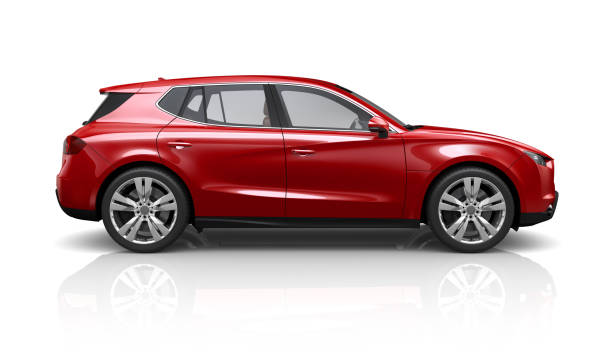

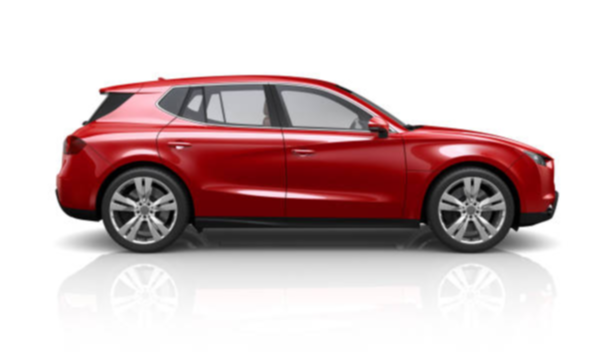

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread(image_path)

# Define a sharpening kernel
gaussian_blur_kernel = np.array([[1.0/16, 2.0/16, 1.0/16],
                              [2.0/16, 4.0/16, 2.0/16],
                              [1.0/16, 2.0/16, 1.0/16]])

# Apply the sharpening kernel using convolution
gaussian_blurred_image = cv2.filter2D(image, -1, gaussian_blur_kernel)

# Display the original and sharpened images
cv2_imshow(image)
cv2_imshow(gaussian_blurred_image)

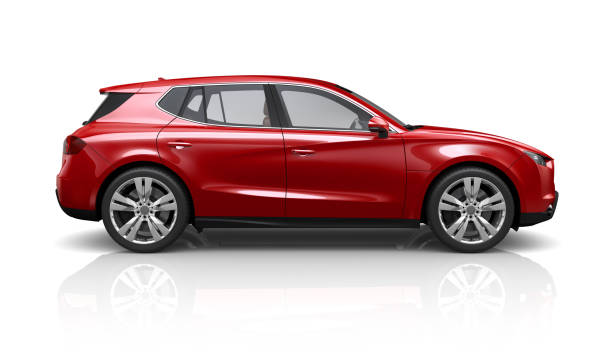

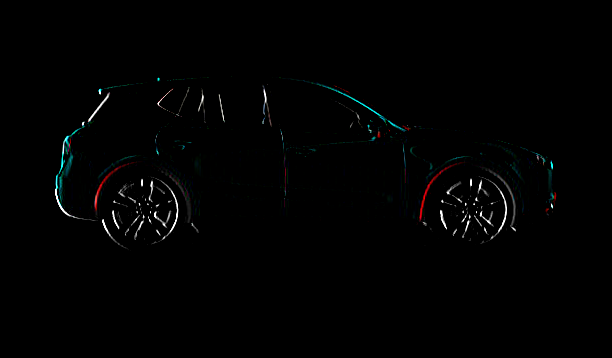

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread(image_path)

# Define a sharpening kernel
gaussian_blur_kernel = np.array([[1, 0, -1],
                              [1, -1, -1],
                              [1, 0, -1]])

# Apply the sharpening kernel using convolution
gaussian_blurred_image = cv2.filter2D(image, -1, gaussian_blur_kernel)

# Display the original and sharpened images
cv2_imshow(image)
cv2_imshow(gaussian_blurred_image)